# Naive Bayes Classifier - Implementation from scratch 
This notebook is an attempt to understand the mechanics of Naive Bayes Algorithm.
It contains 4 section:
- **Data Preparation** - Importing libraries and splitting the data in train test sets
- **Detailed implementation** of Naive Bayes - Step by step explanation but no efficient
- **Efficient implementation** of Naive Bayes - Focus on code efficiency
- **Sklearn implementation** - Comparing results with previous implementations. The comparision is done by only looking at the **confusion metrics**

# Importing Libraries & Data Preparation

### Importing required libraries

In [57]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelBinarizer
import re
from matplotlib import pyplot as plt

### Importing the dataset
- This dataset contains 3000 movie reviews from IMDB website. The response variable captures if the review is positive or negative.
- The sample records of the dataset, and the category distribution is shown below.

In [58]:
inp_dataset = pd.read_csv("IMDB Dataset_V1.csv")
inp_dataset.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


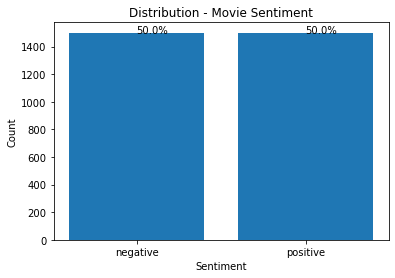

In [59]:
Cat_Count_df = inp_dataset.sentiment.value_counts().reset_index() 
Cat_Count_df["Percentage"] = Cat_Count_df["sentiment"]/Cat_Count_df["sentiment"].sum()*100
plt.bar(Cat_Count_df["index"], Cat_Count_df["sentiment"])
plt.xticks(Cat_Count_df["index"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution - Movie Sentiment")
for ind,row in Cat_Count_df.iterrows():
    plt.annotate(text=str(round(row["Percentage"],1))+"%",xy = (row["index"],row["sentiment"]))

plt.show()

### Cleaning the articles to remove the unwanted characters
- In this implementation, we are performing only basic data cleaning steps like removing numbers, punctuations and special characters and tags from text.
- This is done using regular expressions in the function defined as **text_clean**.
- Finally, we are splitting the data in to train and test set using *sklearn's function* **train_test_split**. The code is set to have 70% data in the training set.

In [60]:
def text_clean(text_series):
    text_series = text_series.str.lower()
    clean_2 = text_series.str.replace(r"<.*>|[^a-zA-Z\s]","")
    clean_3 = clean_2.str.replace(r"\s+", " ")
    return clean_3

In [61]:
inp_dataset["Text_Clean"] = text_clean(inp_dataset["review"])

In [62]:
train_x, test_x, train_y, test_y = train_test_split(inp_dataset["Text_Clean"], 
                                                    inp_dataset["sentiment"], 
                                                    test_size = 0.3, 
                                                    random_state = 8)

# Detailed Implementation of Naive Bayes

### Creating Bag of Words
- In this step we are creating a dataframe which has the count frequency of each word in each document also called as **bag of Words**
- This is done using *sklearn's* **CountVectorizer** function. The function provides us with an option to remove stop words. This is done by passing **the argument *stop_words* as "english"**.
- The same CountVectorizer is also used for creating the count frequencies of Test dataset. Notice, while transforming test dataset we are using the method **transform** and **not fit_transform**. This is to ensure that the test data has the same dimensions as training dataset.

In [63]:
Cnt_Vec = CountVectorizer(stop_words="english")
BOW_train = Cnt_Vec.fit_transform(train_x).toarray()
BOW_train_Df = pd.DataFrame(BOW_train, columns=Cnt_Vec.get_feature_names())
BOW_train_Df[:4]

,aaahthe,aaargh,aag,aaip,aamir,aardman,aaron,aawip,ab,abandon,...,zorro,zorros,zu,zucco,zucker,zudina,zues,zulu,zurich,zwart
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
BOW_test = Cnt_Vec.transform(test_x).toarray()
BOW_test_Df = pd.DataFrame(BOW_test, columns=Cnt_Vec.get_feature_names())
BOW_test_Df[:4]

,aaahthe,aaargh,aag,aaip,aamir,aardman,aaron,aawip,ab,abandon,...,zorro,zorros,zu,zucco,zucker,zudina,zues,zulu,zurich,zwart
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Merging BOW data frames with respective Categories
- To consolidate the word frequencies for each category, the review sentiment is added to the bag of words frequency tables.
- Note that this is done just for explanation purposes. In the effecient implementation this step would not be required.

In [65]:
BOW_train_Df["Category_Values"] = train_y.reset_index()["sentiment"]
BOW_test_Df["Category_Values"] = test_y.reset_index()["sentiment"]
BOW_train_Df.head(5)

,aaahthe,aaargh,aag,aaip,aamir,aardman,aaron,aawip,ab,abandon,...,zorros,zu,zucco,zucker,zudina,zues,zulu,zurich,zwart,Category_Values
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


### Consolidating bag of words for each category
- In this section we are grouping all the word frequencies on the basis of review sentiment. Another column containing the number of documents in each category is also added.
- Further, for calculating the sum of all word counts in each category an additional column is added.
- As mentioned earlier, all these steps are inefficient and added only for explanation purpose.

In [66]:
Cons_df = BOW_train_Df.groupby("Category_Values",as_index = False).sum().reset_index(drop=True)
Category_Count_df = BOW_train_Df["Category_Values"].value_counts().reset_index()
Category_Count_df.columns = ["Category_Values", "Category_Count"]
Cons_df = pd.merge(Cons_df,Category_Count_df,on="Category_Values",how = "left")
Cons_df["sum_all_words"] = Cons_df.drop(["Category_Count","Category_Values"],axis = 1).sum(axis = 1)

### Creating Probability Table
- Using the consolidated table we created in the previous section, we will now calculate the probabilities of each word occuring in each sentiment category
- Laplace smoothing is also built in to ensure that words with 0 frequency are taken care of. This table will be used to predict the category of the test documents

In [67]:
alpha = 1
prob_table = pd.DataFrame()
prob_table["Category_Values"] = Cons_df["Category_Values"]
prob_table["p_C"] = Cons_df["Category_Count"]/Cons_df["Category_Count"].sum()
cols = [col for col in Cons_df.columns if col not in ["Category_Values", "Category_Count", "sum_all_words"]]
no_of_cols = len(cols)
for col in cols:
    prob_table[col] = np.log((Cons_df[col]+alpha)/(Cons_df["sum_all_words"] + (alpha*no_of_cols)))
prob_table["p_C"] = np.log(prob_table["p_C"])

### Testing the model on test data
- The probability table calculated in the previous section is utilized here to calculate the probability of each test document being a +ve or -ve review.
- The confusion matrics is presented to check the accuracy of the model

In [68]:
train_array = prob_table.drop(["Category_Values","p_C",],axis = 1)
train_array = np.array(train_array)
predict_df = pd.DataFrame(np.dot(BOW_test,train_array.T) + np.array(prob_table["p_C"]),columns=["negative", "positive"])
predict_df["final_category"] = predict_df.idxmax(axis = 1)
predict_df["Original_Cateogry"] = BOW_test_Df["Category_Values"]

In [69]:
pd.crosstab(predict_df["final_category"], predict_df["Original_Cateogry"] )

Original_Cateogry,negative,positive
final_category,,
negative,365,105
positive,82,348


# Efficient implementation of Naive Bayes

### Defining Alpha

In [22]:
alpha = 1

### Creating Bag of words for both train and test set

In [7]:
Cnt_Vec = CountVectorizer(stop_words="english")
BOW_train = Cnt_Vec.fit_transform(train_x).toarray()
BOW_test = Cnt_Vec.transform(test_x).toarray()

### Converting response variable to binary array for each review

In [31]:
lbl = LabelBinarizer()
train_Y = lbl.fit_transform(train_y)
if train_Y.shape[1] == 1:
    train_Y = np.concatenate([1 - train_Y, train_Y], axis=1)
cat_count_arr = np.log(np.sum(train_Y,axis = 0)/np.sum(train_Y))
classes = lbl.classes_

### Grouping Bag of words for each response category

In [10]:
consolidated_train_df = np.dot(np.transpose(train_Y),BOW_train)

### Creating the probability table

In [46]:
prob_table_numer = consolidated_train_df + alpha
prob_table_denom = np.sum(prob_table_numer,axis=1)
prob_table = np.log(prob_table_numer) - np.log(prob_table_denom.reshape(-1,1))

### Predicting the review sentiment of test dataset 

In [47]:
predict_arr = classes[np.argmax(np.dot(BOW_test,np.transpose(prob_table))+cat_count_arr,axis=1)]

### Confusion Metrics

In [70]:
pd.crosstab(predict_arr, test_y)

sentiment,negative,positive
row_0,,
negative,365,105
positive,82,348


# Implementation using SKlearn

### Training the model

In [71]:
MNB_Model = MultinomialNB(alpha=1)
MNB_Model.fit(BOW_train, train_y)

MultinomialNB(alpha=1)

### Predicting the review sentiment

In [72]:
prediction = MNB_Model.predict(BOW_test)

### Confusion Metrics

In [21]:
pd.crosstab(prediction, test_y)

sentiment,negative,positive
row_0,,
negative,365,105
positive,82,348
